# **Student Depression Analysis**

Mental health issues, including depression, have become increasingly prevalent among students due to various stressors such as academic pressure, financial constraints, and lifestyle challenges. This analysis aims to explore the factors contributing to student depression by leveraging data that includes demographics, academic performance, lifestyle habits, and mental health indicators.

**Key Objectives:**
- Understand Trends: Identify patterns and trends in student depression based on various demographic and lifestyle factors.
- Analyze Risk Factors: Determine the influence of factors such as academic and work pressure, sleep duration, dietary habits, and family history of mental illness.
- Predictive Modeling: Build a machine learning model to predict the likelihood of depression among students based on the available features.
- Insights for Intervention: Provide actionable insights that can help educators, policymakers, and mental health professionals to support students.

## *Importing Necessary Libraries*

In [1]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations and handling arrays
import seaborn as sns  # For creating statistical data visualizations
import matplotlib.pyplot as plt  # For general-purpose plotting
from sklearn.preprocessing import StandardScaler  # For feature scaling and standardization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LogisticRegression  # For building logistic regression models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score  # For model evaluation metrics
from scipy.stats import zscore # For computing z-score
import warnings # For suppressing unnecessary warnings
import pickle # To save model
from sklearn.preprocessing import StandardScaler, LabelEncoder # For normalizing values and encoding
from sklearn.feature_selection import f_classif # To calculate ANOVA test values

# **Exploratory Data Analysis**

## *Loading Dataset*

In [2]:
df = pd.read_csv('Student Depression Dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


## *Statistical Summary*

In [3]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


## *Dataset Overview*

In [4]:
# Checking rows and columns
df.shape

(27901, 18)

In [5]:
# Checing non-null value counts and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [6]:
# Checking column names
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

## *Datatypes and Unique Value Counts*

In [7]:
# Checking datatypes
df.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [8]:
# Unique values count
df.nunique()

id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             5
Family History of Mental Illness             2
Depression                                   2
dtype: int64

## *Missing Values Analysis*

In [9]:
# Count of missing values
missing = df.isnull().sum()
missing

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [10]:
# Percentage of missing values
per =  (missing / len(df)) * 100
per

id                                       0.000000
Gender                                   0.000000
Age                                      0.000000
City                                     0.000000
Profession                               0.000000
Academic Pressure                        0.000000
Work Pressure                            0.000000
CGPA                                     0.000000
Study Satisfaction                       0.000000
Job Satisfaction                         0.000000
Sleep Duration                           0.000000
Dietary Habits                           0.000000
Degree                                   0.000000
Have you ever had suicidal thoughts ?    0.000000
Work/Study Hours                         0.000000
Financial Stress                         0.010752
Family History of Mental Illness         0.000000
Depression                               0.000000
dtype: float64

## *Duplicates and Unnecessary Columns*

In [11]:
# Dropping duplicates
df = df.drop_duplicates()
df.shape

(27901, 18)

In [12]:
# Dropping unnecessary column
df = df.drop(columns=['id'])
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


## *Univariate Analysis: Numeric Features Distribution*

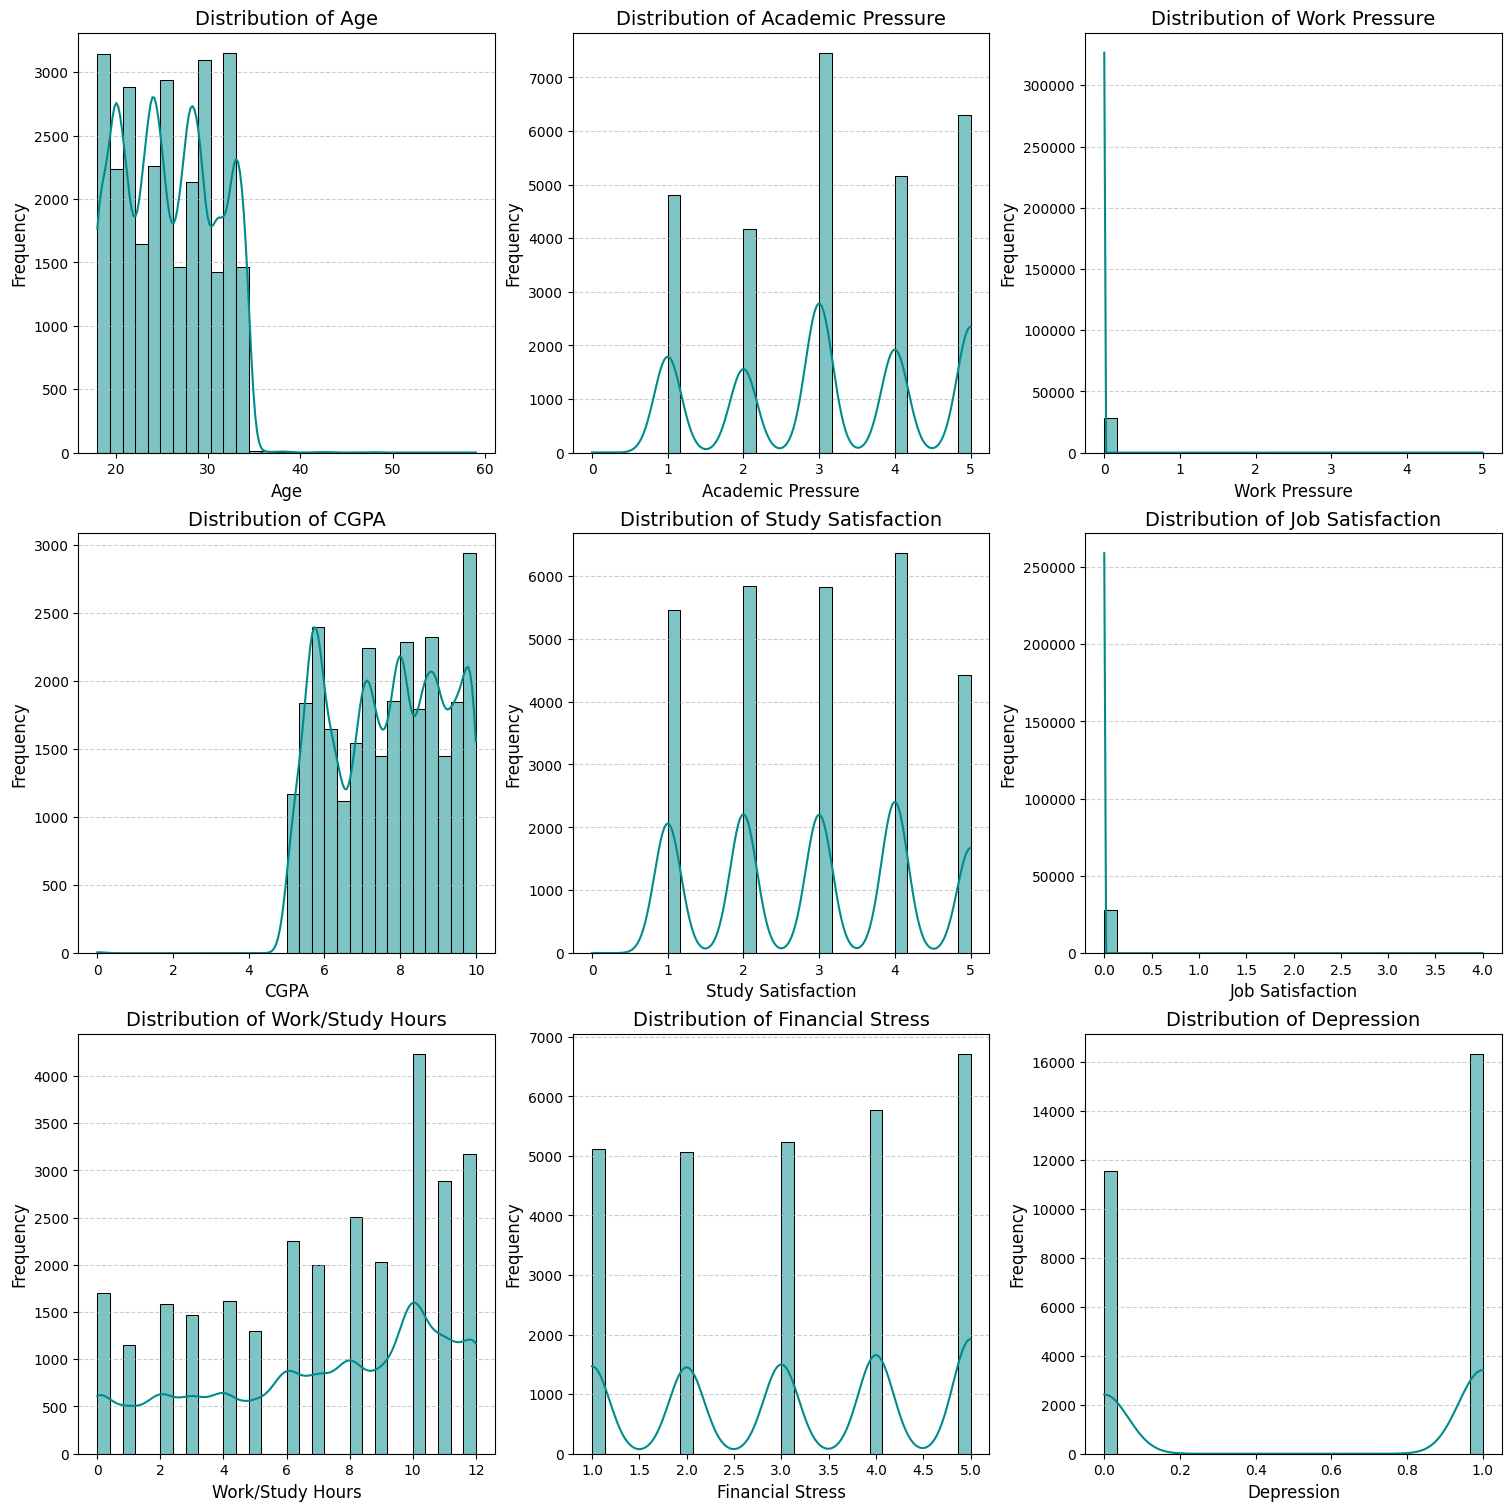

In [13]:
numerical_columns = df.select_dtypes(include=['number']).columns

num_cols = len(numerical_columns)
cols = 3
rows = (num_cols + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), constrained_layout=True)
axes = axes.flatten()

for i, j in enumerate(numerical_columns):
    sns.histplot(df[j], kde=True, bins=30,  color='darkcyan', ax=axes[i])
    axes[i].set_title(f"Distribution of {j}", fontsize=14)
    axes[i].set_xlabel(j, fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    axes[i].set_ylabel("Frequency", fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [14]:
warnings.filterwarnings("ignore")

## *Univariate Analysis: Categorical Features Distribution*

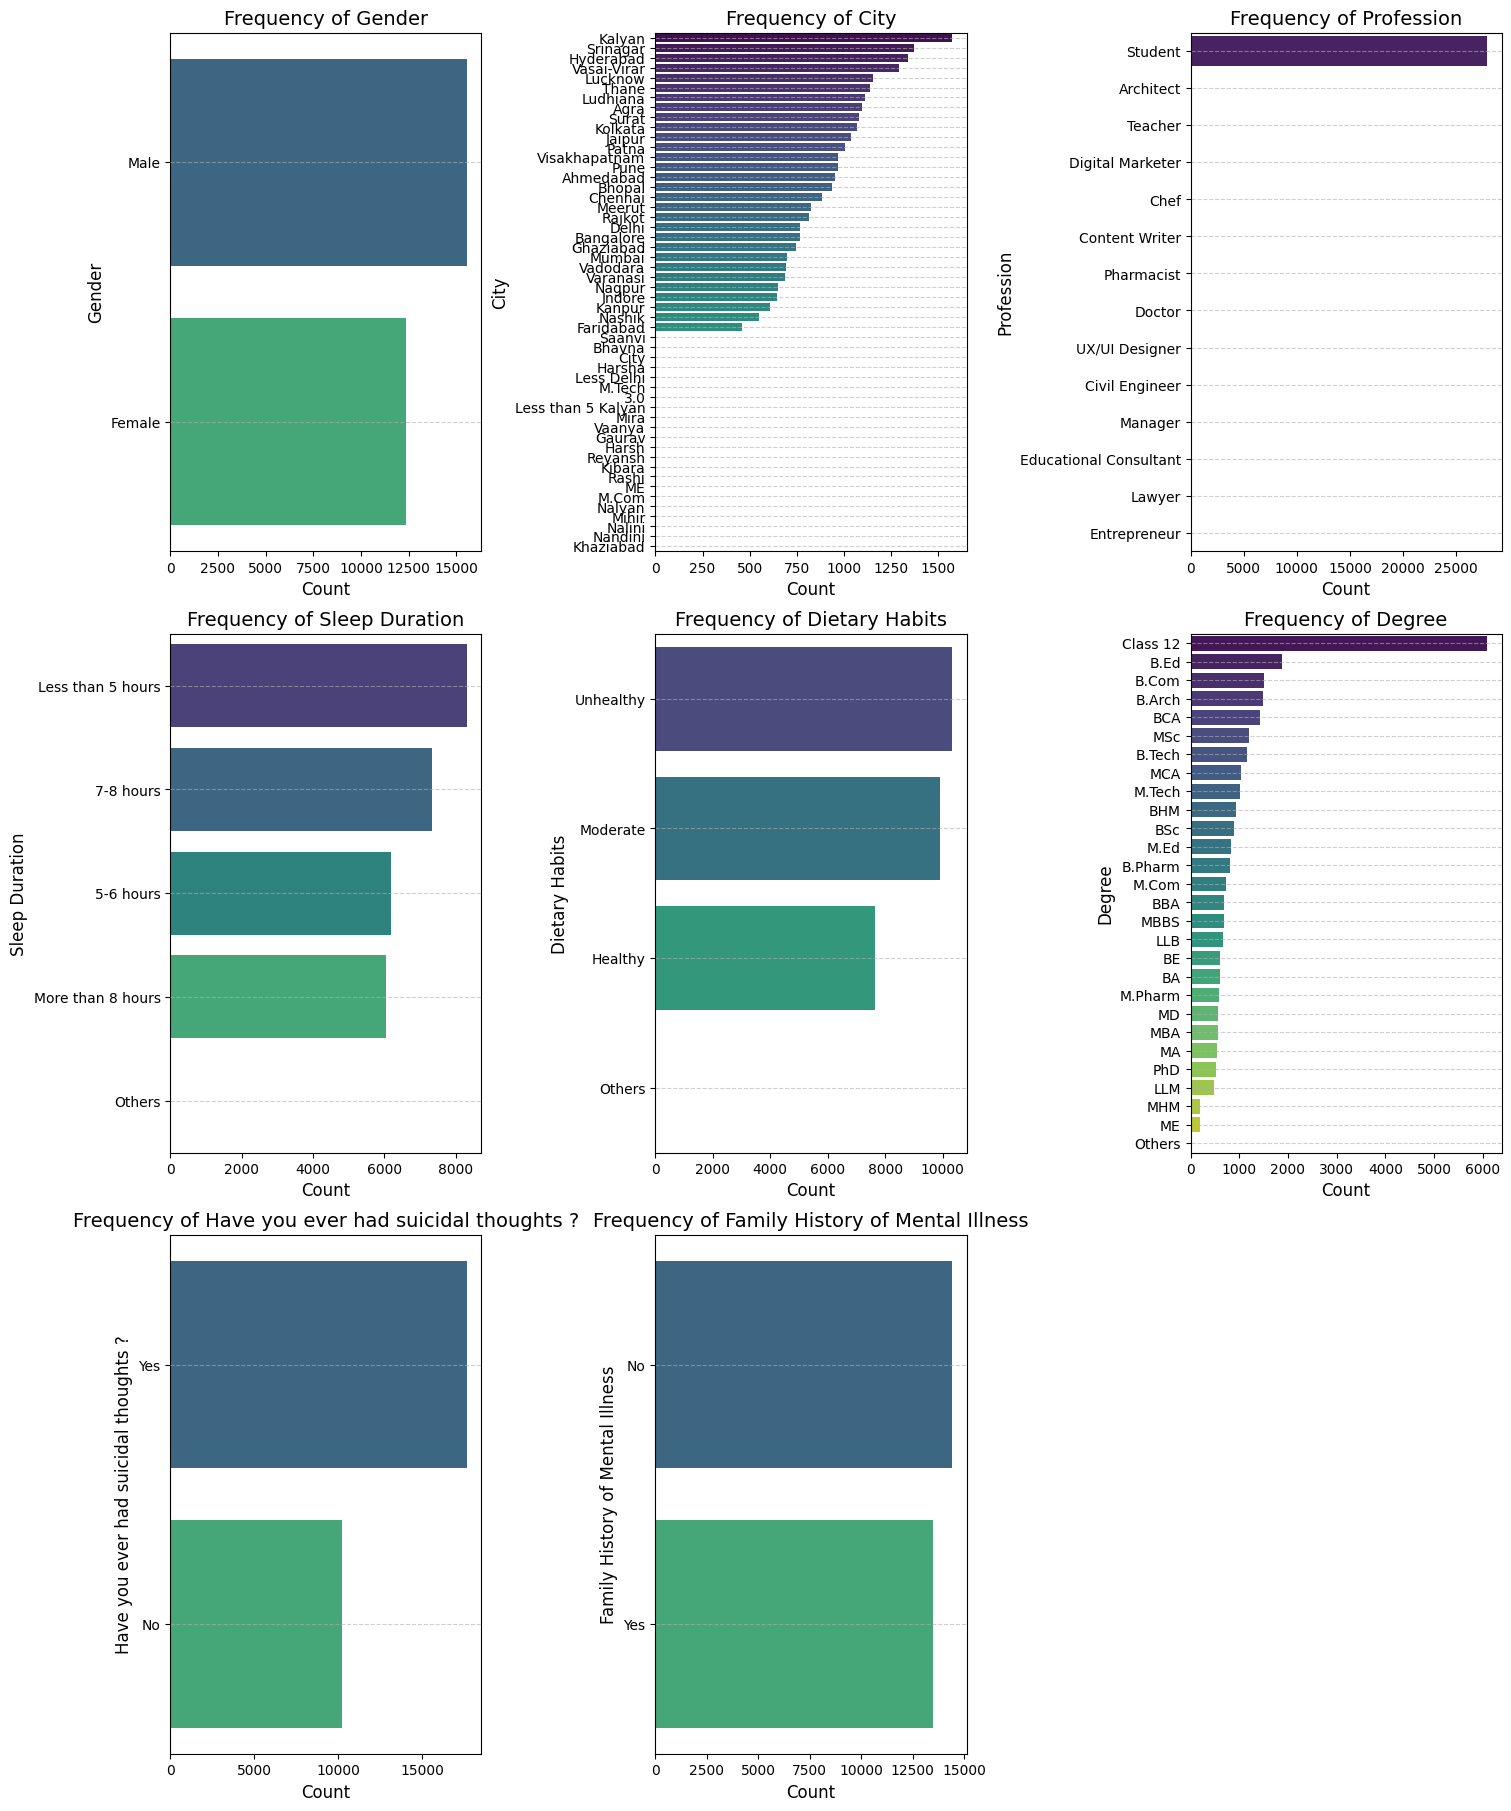

In [15]:
categorical_columns = df.select_dtypes(include=['object']).columns

num_cols = len(categorical_columns)
cols = 3
rows = (num_cols + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 6), constrained_layout=True)
axes = axes.flatten()

for i, j in enumerate(categorical_columns):
    sns.countplot(data=df, y=j, order=df[j].value_counts().index, palette="viridis", ax=axes[i])
    axes[i].set_title(f"Frequency of {j}", fontsize=14)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    axes[i].set_xlabel("Count", fontsize=12)
    axes[i].set_ylabel(j, fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

## *Outlier Detection*

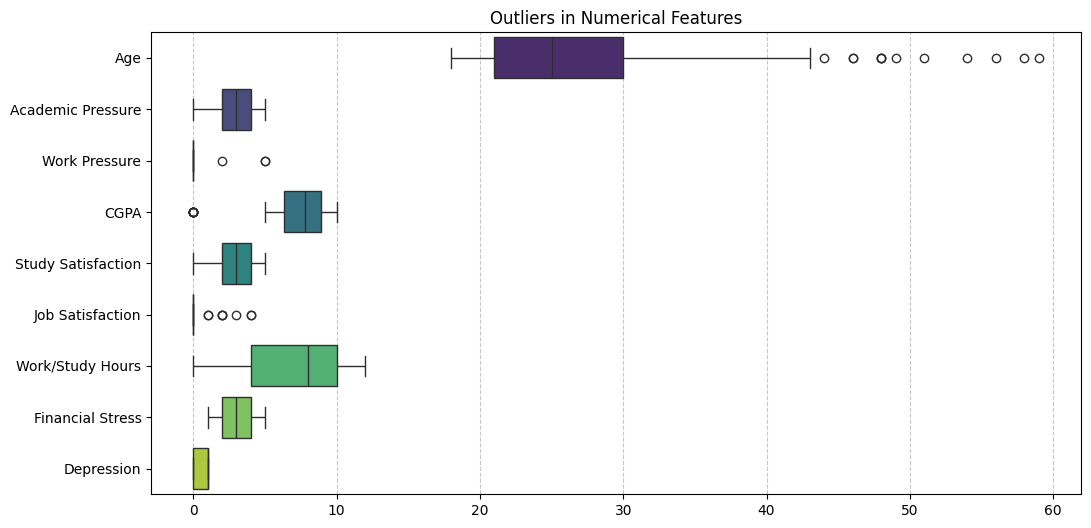

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns], orient='h', palette='viridis')

plt.title('Outliers in Numerical Features')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

## *Correlation Analysis*

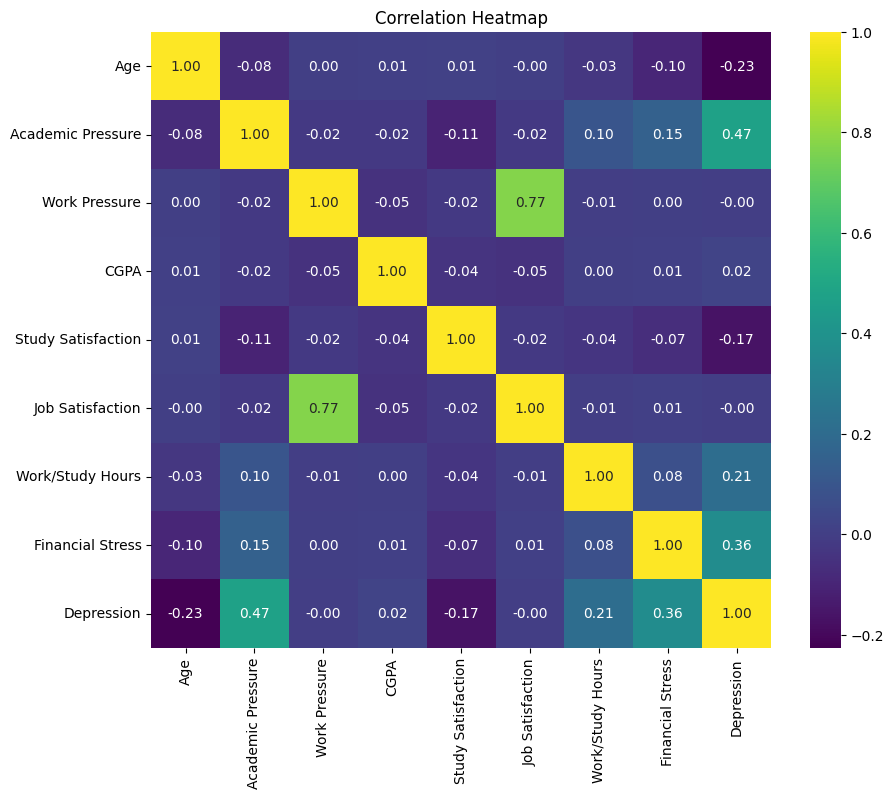

In [17]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

## *Bivariate Analysis: Numerical Feature Distribution*

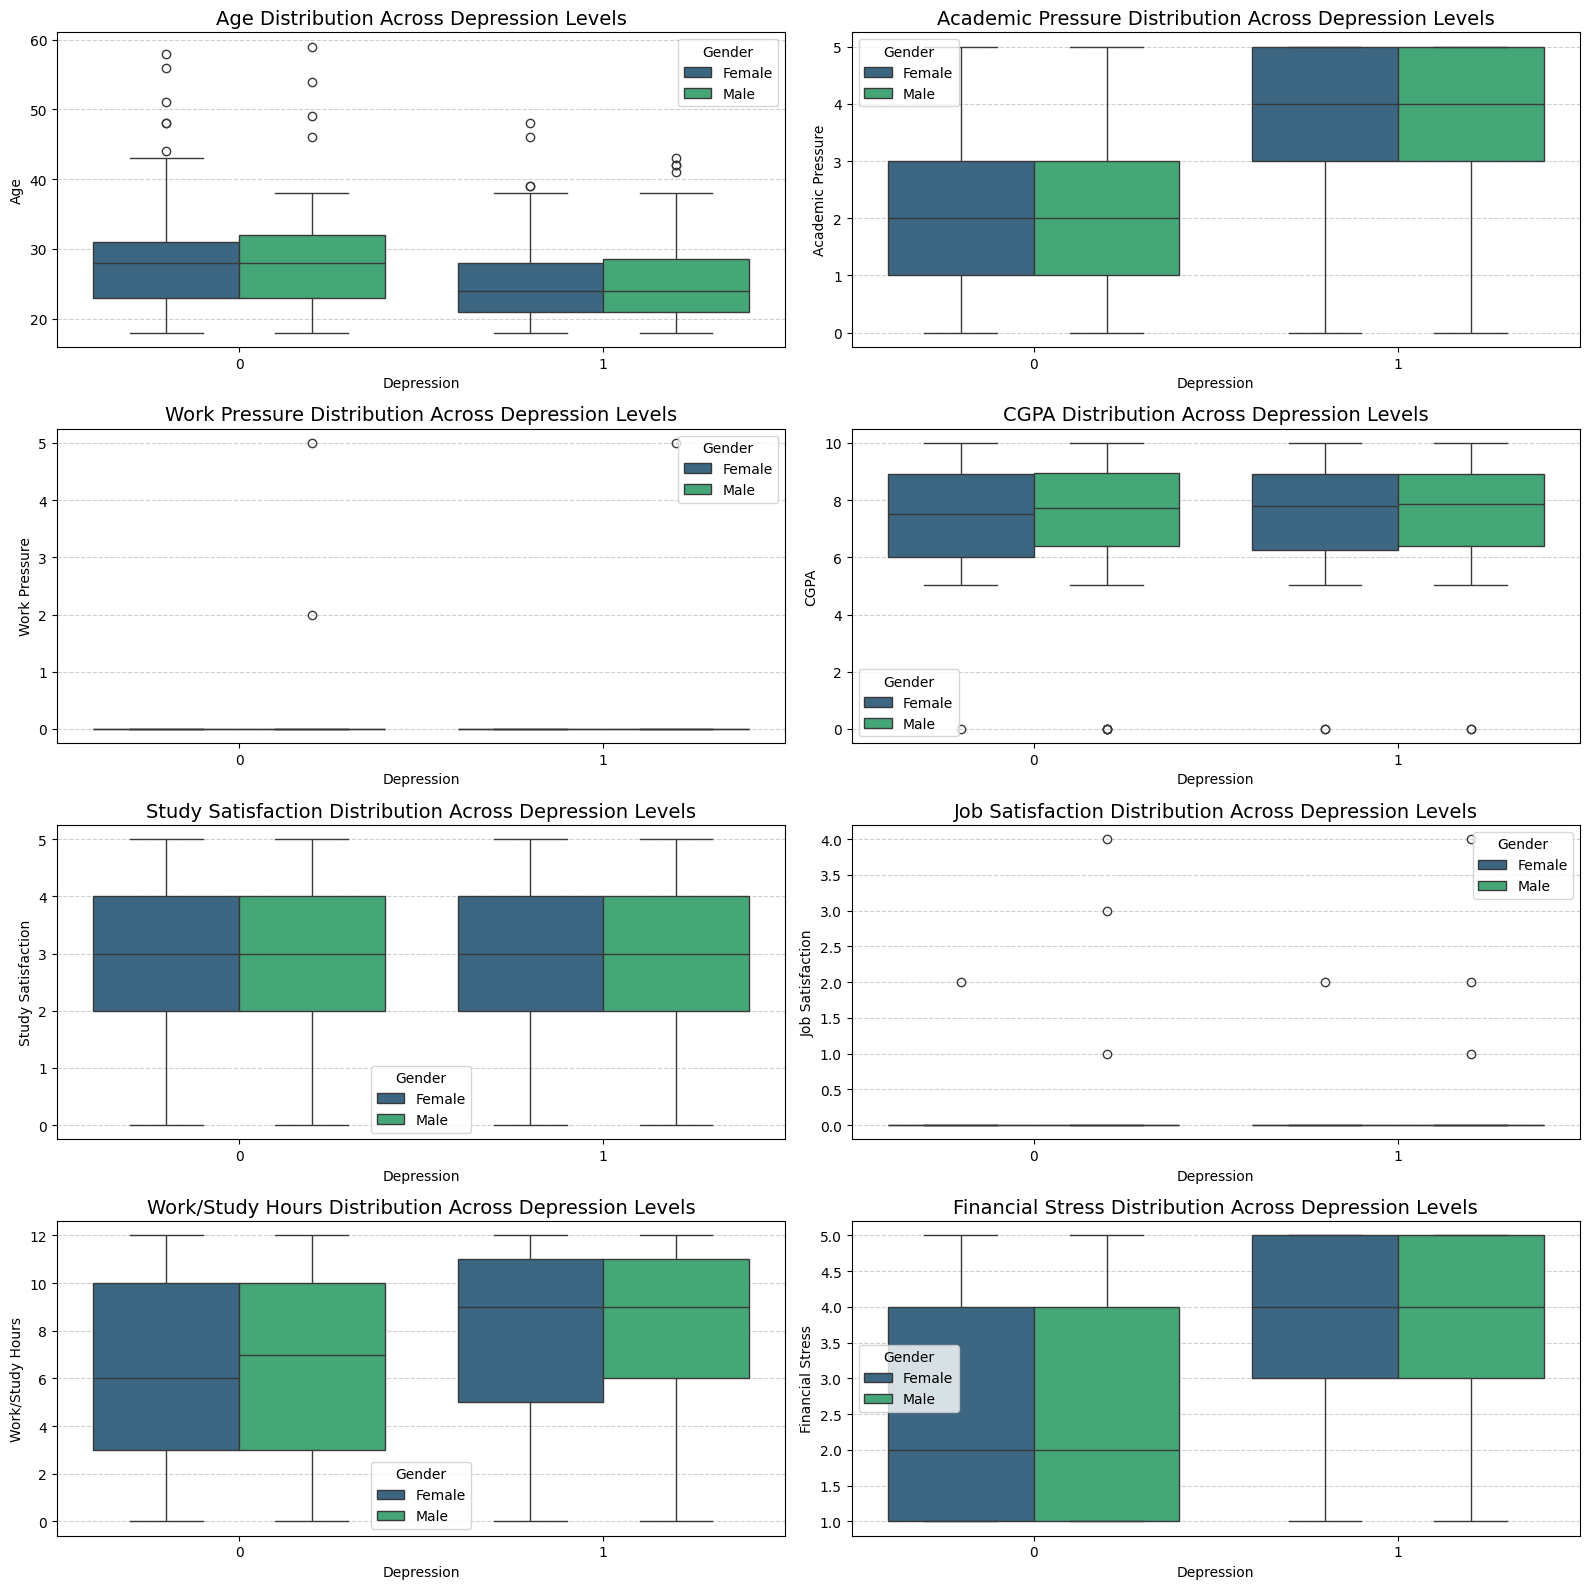

In [18]:
n_cols = 2
n_rows = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 16)) 
axes = axes.flatten()

for i, j in enumerate([col for col in numerical_columns if col != 'Depression']):
    sns.boxplot(x='Depression', y=j, data=df, hue='Gender', palette='viridis', ax=axes[i])
    axes[i].set_title(f'{j} Distribution Across Depression Levels', fontsize=14)
    axes[i].set_xlabel('Depression')
    axes[i].set_ylabel(j)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


## *Bivariate Analysis: Categorical Feature Distribution*

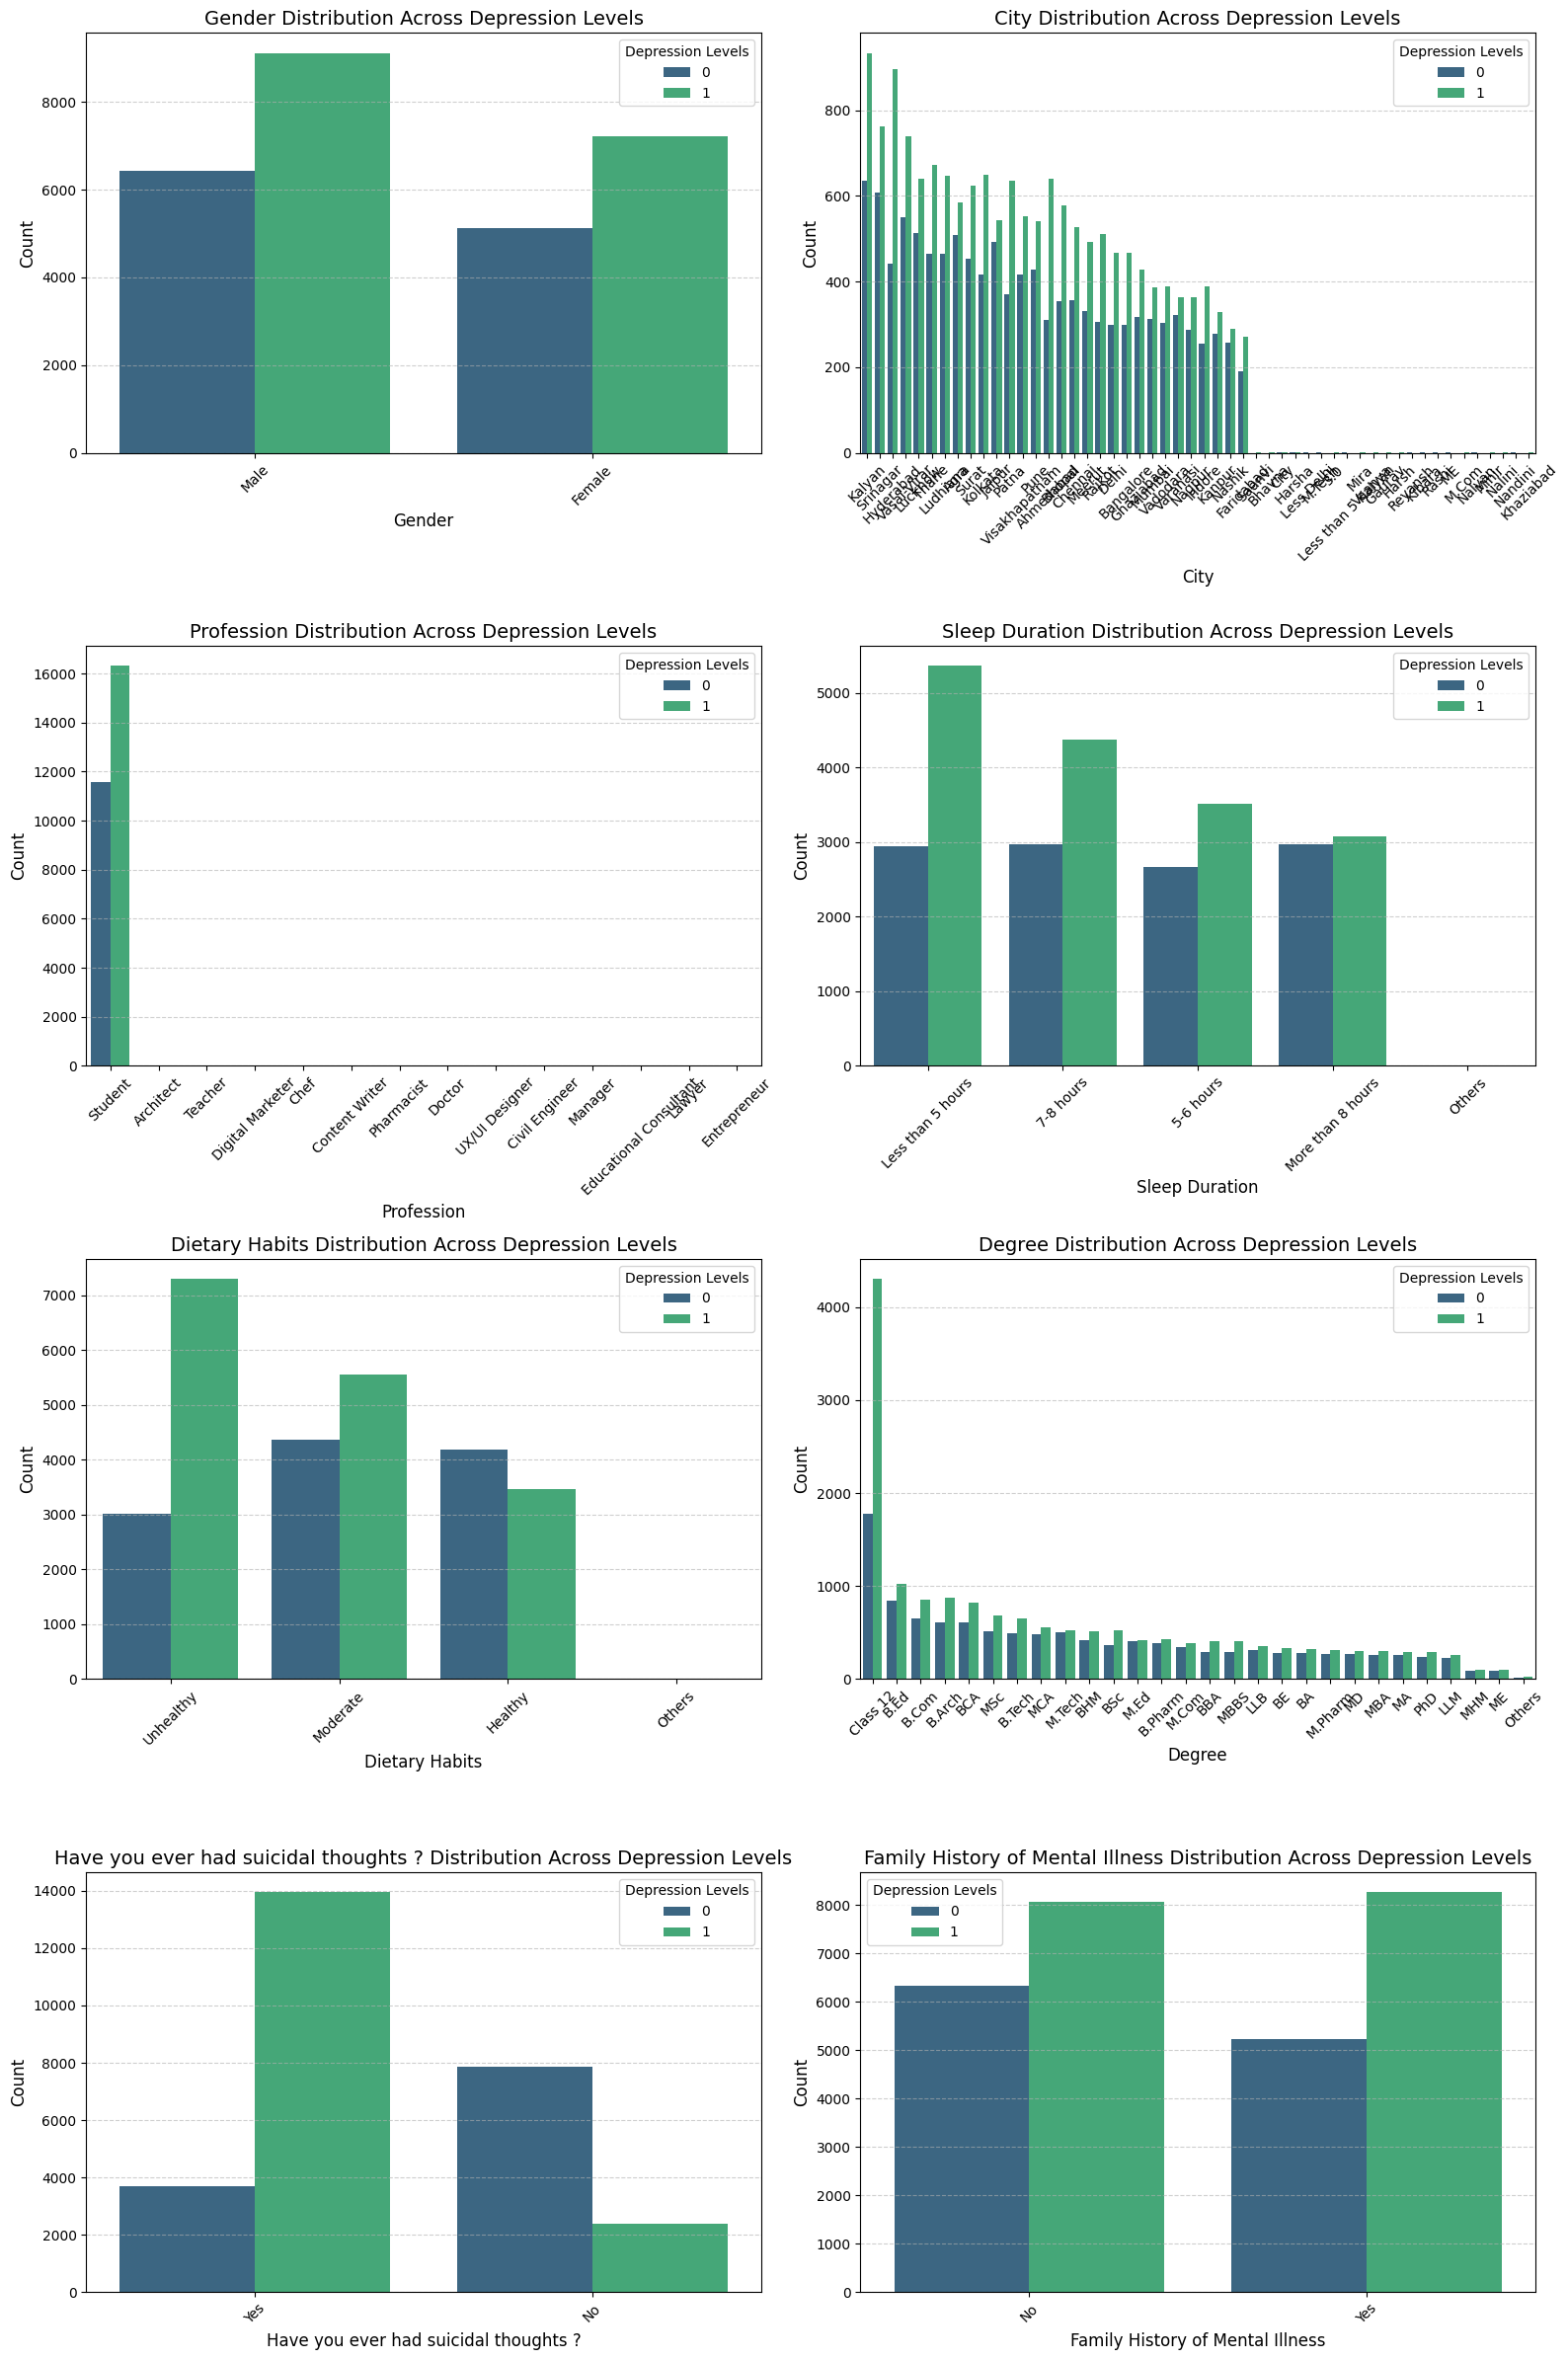

In [19]:
n_cols = 2
n_rows = (len(categorical_columns) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 6))
axes = axes.flatten()

for i, j in enumerate(categorical_columns):
    sns.countplot(data=df, x=j, hue='Depression', palette='viridis', order=df[j].value_counts().index, ax=axes[i])
    axes[i].set_title(f'{j} Distribution Across Depression Levels', fontsize=14)
    axes[i].set_xlabel(j, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    axes[i].legend(title='Depression Levels', fontsize=10)

for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## *Pairwise Analysis*

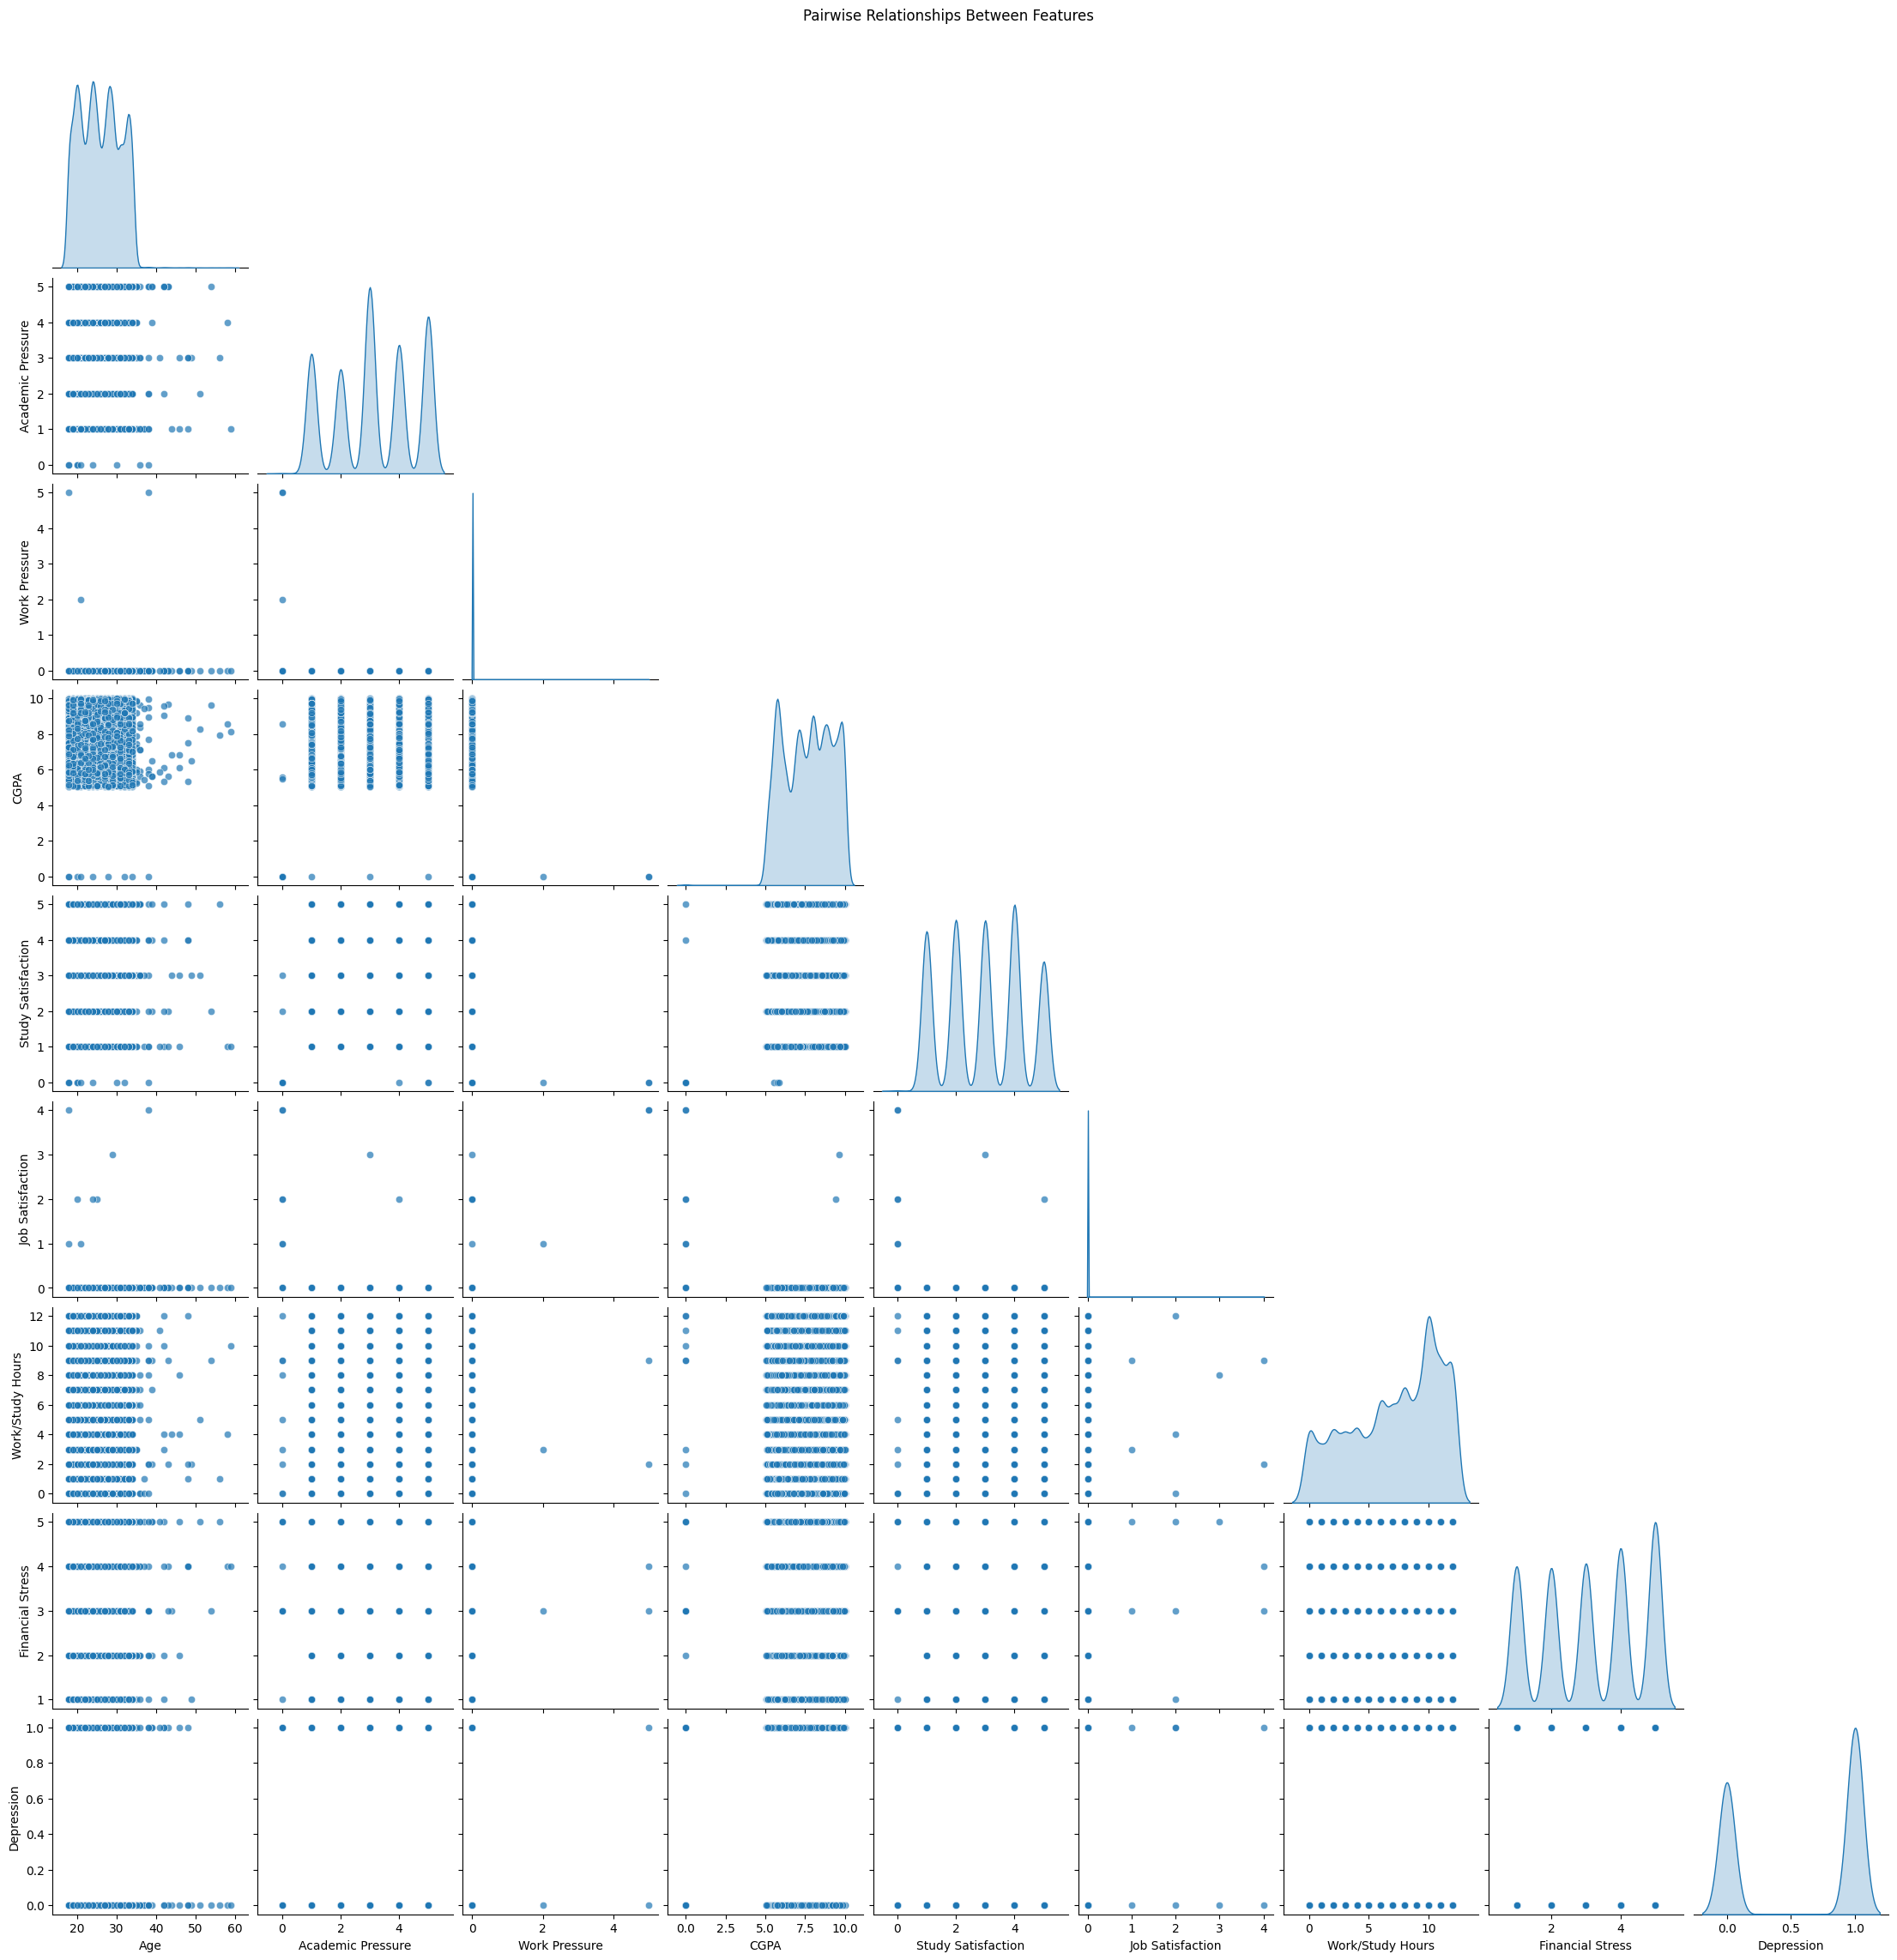

In [20]:
sns.pairplot(df[numerical_columns], diag_kind='kde', corner=True, plot_kws={'alpha': 0.7})
plt.suptitle('Pairwise Relationships Between Features', y=1.02)
plt.show()

## *Grouped Aggregations*

In [21]:
# Gender level
gender = df.groupby('Gender')[numerical_columns].mean().sort_values(by='Depression', ascending=False)
gender

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
Gender,,,,,,,,,
Male,25.861967,3.113848,0.000772,7.703352,2.924680,0.000965,7.199974,3.132832,0.586287
Female,25.772381,3.175652,0.000000,7.596645,2.967946,0.000324,7.102882,3.148721,0.584507


In [22]:
# Suicidal thoughts level
suicide = df.groupby('Have you ever had suicidal thoughts ?')[numerical_columns].mean().sort_values(by='Depression', ascending=False)
suicide

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
Have you ever had suicidal thoughts ?,,,,,,,,,
Yes,25.398165,3.416402,0.000396,7.66564,2.857272,0.000566,7.499604,3.368826,0.790496
No,26.553245,2.666959,0.000488,7.63967,3.093021,0.000878,6.566520,2.745167,0.232211


# **Data Preprocessing**

## *Handling Missing Values*

In [23]:
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].median())
df.isnull().sum()

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

## *Encoding Categorical Variables*

In [24]:
# Getting unique values
for i in categorical_columns:
    print(f"Column: {i}")
    print(df[i].unique())
    print("-" * 50)

Column: Gender
['Male' 'Female']
--------------------------------------------------
Column: City
['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']
--------------------------------------------------
Column: Profession
['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
--------------------------------------------------
Column: Sleep Duration
['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More t

## *Encoding Categorical Variables*

In [25]:
# Binary Classification
binary = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for i in binary:
    df[i] = df[i].map({'Yes': 1, 'No': 0})
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,1,3.0,1.0,0,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,0,3.0,2.0,1,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,0,9.0,1.0,1,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,1,4.0,5.0,1,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,1,1.0,1.0,0,0


In [26]:
# Ordinal Classification
ordinal = {
    'Sleep Duration': {'Less than 5 hours': 1, '5-6 hours': 2, '7-8 hours': 3, 'More than 8 hours': 4, 'Others': 0},
    'Dietary Habits': {'Unhealthy': 1, 'Moderate': 2, 'Healthy': 3, 'Others': 0}
}

for i, j in ordinal.items():
    df[i] = df[i].map(j)
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,2,3,B.Pharm,1,3.0,1.0,0,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,2,2,BSc,0,3.0,2.0,1,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,1,3,BA,0,9.0,1.0,1,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,3,2,BCA,1,4.0,5.0,1,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,2,2,M.Tech,1,1.0,1.0,0,0


## *Droping unnecessary columns*

In [27]:
df = df.drop(columns =  ['Age', 'Degree', 'Profession','Work Pressure', 'Job Satisfaction','City', 'Gender'])
df.shape

(27901, 10)

## *Saving preprocessed data for streamlit Application*

In [ ]:
df.to_csv('preprocessed_data.csv', index=False)

## *Handling Outliers*

In [28]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

#Compute Z-scores
z_scores = df[numerical_cols].apply(zscore)
print('-'*50)
print(df.shape)  

# Filter the dataframe based on Z-scores
df_filtered = df[(z_scores < 3).all(axis=1)]  

# Prepare features (X) and target (y)
X = df_filtered.drop(columns=['Depression'])  # Drop the target column for features
y = df_filtered['Depression'] 
print(X.shape)

Index(['Academic Pressure', 'CGPA', 'Study Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')
--------------------------------------------------
(27901, 10)
(27901, 9)


## *Splitting Data*

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## *Doing ANOVA Test to check importance of retained features*

In [30]:
F_values, p_values = f_classif(X, y)
print(pd.Series(F_values, index=X.columns))  

Academic Pressure                         8121.471807
CGPA                                        13.769509
Study Satisfaction                         810.006999
Sleep Duration                             211.251312
Dietary Habits                            1243.464139
Have you ever had suicidal thoughts ?    11866.855671
Work/Study Hours                          1268.752140
Financial Stress                          4249.584674
Family History of Mental Illness            79.873621
dtype: float64


# **Machine Learning Model**

## *Model Selection*

In [31]:
# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [32]:
# Save the model to a file
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [33]:
# Model accuracy
acc = accuracy_score(y_test, y_pred)
acc

0.8310338648987636

In [34]:
# Confusion Matrix
mat = confusion_matrix(y_test, y_pred)
mat

array([[1799,  544],
       [ 399, 2839]])

In [35]:
# Classification Report
rep = classification_report(y_test, y_pred)
rep

'              precision    recall  f1-score   support\n\n           0       0.82      0.77      0.79      2343\n           1       0.84      0.88      0.86      3238\n\n    accuracy                           0.83      5581\n   macro avg       0.83      0.82      0.82      5581\nweighted avg       0.83      0.83      0.83      5581\n'

In [36]:
# ROC AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
roc_auc

np.float64(0.9048628153144069)

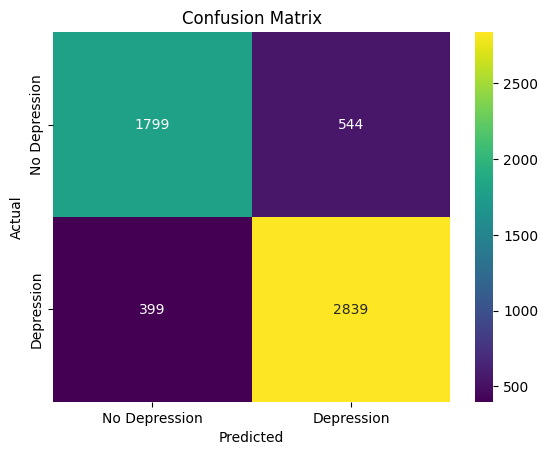

In [37]:
# Visualizing confusion matrix
sns.heatmap(mat, annot=True, fmt='d', cmap='viridis', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Key Insights from the Analysis

1. **Impact of Academic Pressure:**
   - High academic pressure was identified as a leading factor in depression, with students experiencing excessive workloads more likely to report depressive symptoms.
   
2. **Role of Sleep and Lifestyle:**
   - Poor sleep duration (`Less than 5 hours`) and unhealthy dietary habits were strongly correlated with higher depression levels, emphasizing the importance of lifestyle interventions.

3. **Financial and Family Stress:**
   - Students reporting significant financial stress or a family history of mental illness were more prone to depression, highlighting socioeconomic and hereditary influences.

4. **Suicidal Thoughts:**
   - A concerning number of students with depression had experienced suicidal thoughts, underscoring the critical need for mental health support.

5. **Predictive Model Success:**
   - Models demonstrated high predictive accuracy, with feature engineering significantly improving outcomes. These models can be utilized for early detection and proactive mental health interventions.

---

## Conclusion and Future Scope

The **Student Depression Analysis and Prediction** project underscores the multifaceted nature of mental health challenges among students. By exploring the interplay of academic, lifestyle, and psychological factors, this analysis provides a robust framework for understanding and addressing depression.

### Recommendations:
- **For Institutions:** Introduce stress management programs, enhance academic counseling services, and ensure better workload distribution.
- **For Students:** Promote healthier lifestyles, including adequate sleep, balanced diets, and time management strategies.
- **For Policymakers:** Increase funding for student mental health resources and create awareness campaigns to reduce stigma around seeking help.

### Future Work:
- Expanding the dataset to include longitudinal studies for tracking mental health trends over time.
- Incorporating advanced models like deep learning for improved predictive capabilities.
- Collaborating with mental health professionals to design targeted intervention programs based on data-driven insights.

This project not only advances the understanding of student mental health but also provides practical tools and strategies for making a positive impact in educational settings.